In [172]:
# importing the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [187]:
#load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
test.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


In [169]:
#understand the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
x    1000 non-null float64
y    999 non-null float64
dtypes: float64(2)
memory usage: 15.8 KB


In [170]:
#check for and drop the null values 
nan_df=train[train.isna().any(axis=1)]
#nan_df.head()
train = train.dropna(how='any')

In [171]:
#reshape to 2D
X = train['x'].values.reshape(-1,1)
y = train['y'].values.reshape(-1,1)
X_test = test['x'].values.reshape(-1,1)
y_test = test['y'].values.reshape(-1,1)

In [174]:
#scale the features
X=preprocessing.scale(X)
X_test=preprocessing.scale(X_test)

In [175]:
#fit the model with the train data
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
# linear regression model basically finds the best value for the intercept and slope
y_intercept = regr.intercept_
y_intercept = np.round(y_intercept,decimals=2)
slope = regr.coef_
slope = np.round(slope,decimals=2)
print("The slope is",slope,"and intercept",y_intercept)

The slope is [[28.93]] and intercept [50.32]


In [180]:
#get the values for the lines
y_prediction = regr.predict(X_test)
regression = regr.predict(X)

In [182]:
#Accuracy Scores
prediction=r2_score(y_test,y_prediction)
regression_s=r2_score(y,regression)
print(prediction,regression_s)

0.9881847555273174 0.9901655735846986


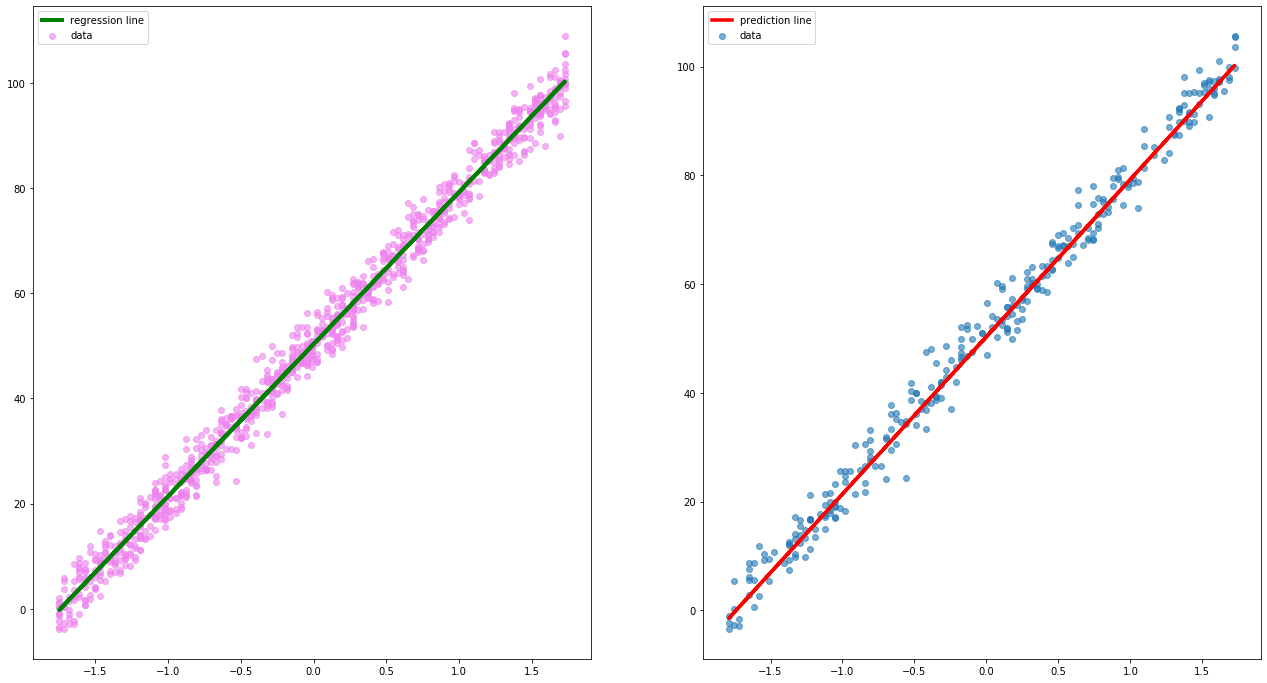

In [186]:
#plotting the regression and prediction lines against the datasets
plt.gcf().set_size_inches(22, 12, forward=True)
plt.subplot(1, 2, 1)
plt.scatter(X, y, color = 'violet', label = 'data',alpha=0.6)
plt.plot(X, regression, color = 'green', label = 'regression line',linewidth=4)
plt.legend(loc = 2)

plt.subplot(1, 2, 2)
plt.scatter(X_test,y_test,label='data',alpha=0.6)
plt.plot(X_test,y_prediction,color='red',label='prediction line',linewidth=3.5)
plt.legend(loc = 'upper left')
plt.show()

MANUAL REGRESSION LINE

In [163]:
#generate the slope and intercept for regression line
from statistics import mean
x1=train['x']
y1=train['y']
def best_fit_slope(x1, y1):
    
    m = (((mean(x1) * mean(y1)) - mean(x1 * y1)) / ((mean(x1)**2) - mean(x1**2)))
    c = mean(y1) - m * mean(x1)
    
    return m, c

m, c = best_fit_slope(x1, y1)

print(m, c)

1.00474836929205 -0.21028923120008614


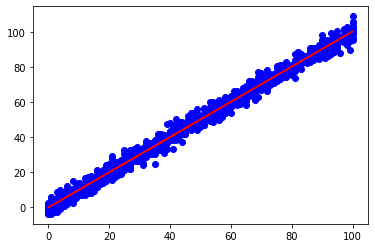

In [164]:
#get the values for the line of best fit(regression line)
regression_line = []
for i in x1:
    regression_line.append((m * i) + c)

plt.scatter(X, y, color = 'blue', label = 'data')
plt.plot(X, regression_line, color = 'red', label = 'regression line')

In [165]:
#Accuracy scores when the null values are dropped
from sklearn.metrics import r2_score
prediction=r2_score(y_test,y_pred)
regression=r2_score(y,regression_line)
print(prediction,regression)

-3323.317212709049 0.9901655735846986


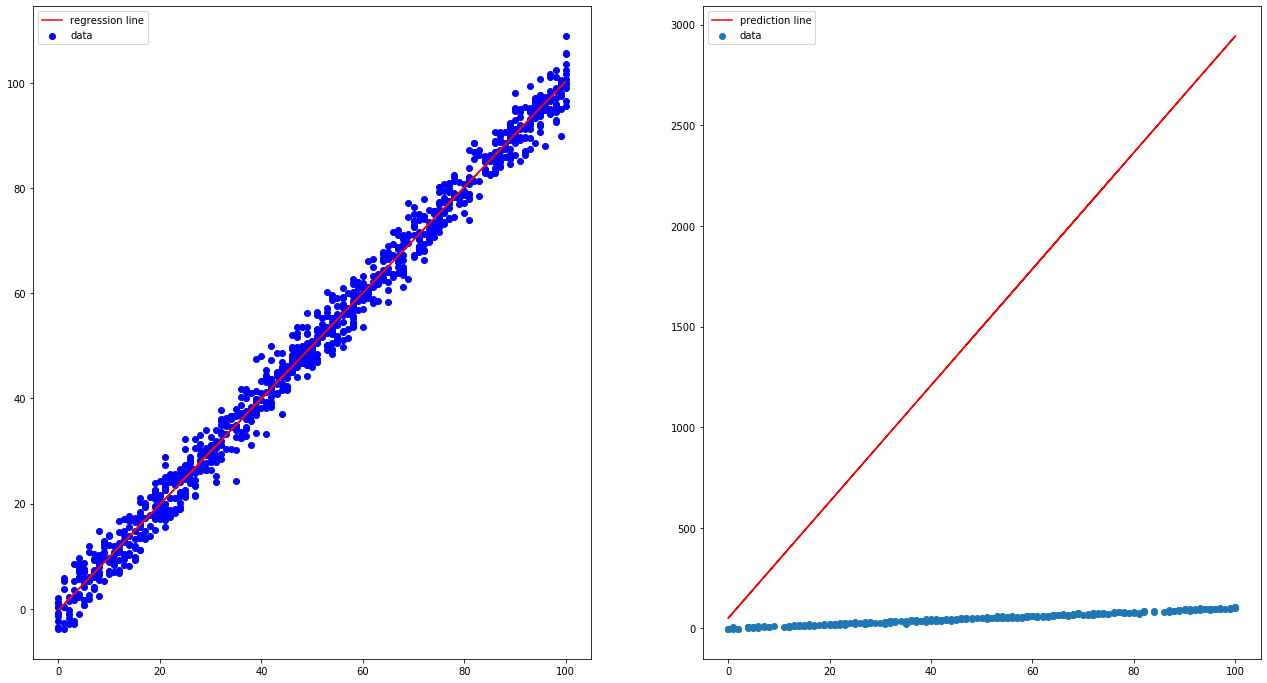

# After imputing the null values with 0

In [212]:
#check for and drop the null values 
nan_df=train[train.isna().any(axis=1)]
nan_df.head()

,x,y


In [213]:
train = train.fillna(0)

In [214]:
Xs = train['x'].values.reshape(-1,1)
ys = train['y'].values.reshape(-1,1)

In [215]:
#reshape then scale the features
Xs = preprocessing.scale(Xs)

In [216]:
#fit the model with the train data
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(Xs,ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [217]:
# linear regression model basically finds the best value for the intercept and slope
y_intercept = regr.intercept_
y_intercept = np.round(y_intercept,decimals=2)
slope = regr.coef_
slope = np.round(slope,decimals=2)
print("The slope is",slope,"and intercept",y_intercept)

The slope is [[5.78]] and intercept [50.27]


In [218]:
y_pred2 = regr.predict(X_test) #using test data to get the prediction line values
regression_line = regr.predict(Xs) #using train data to get regression line values


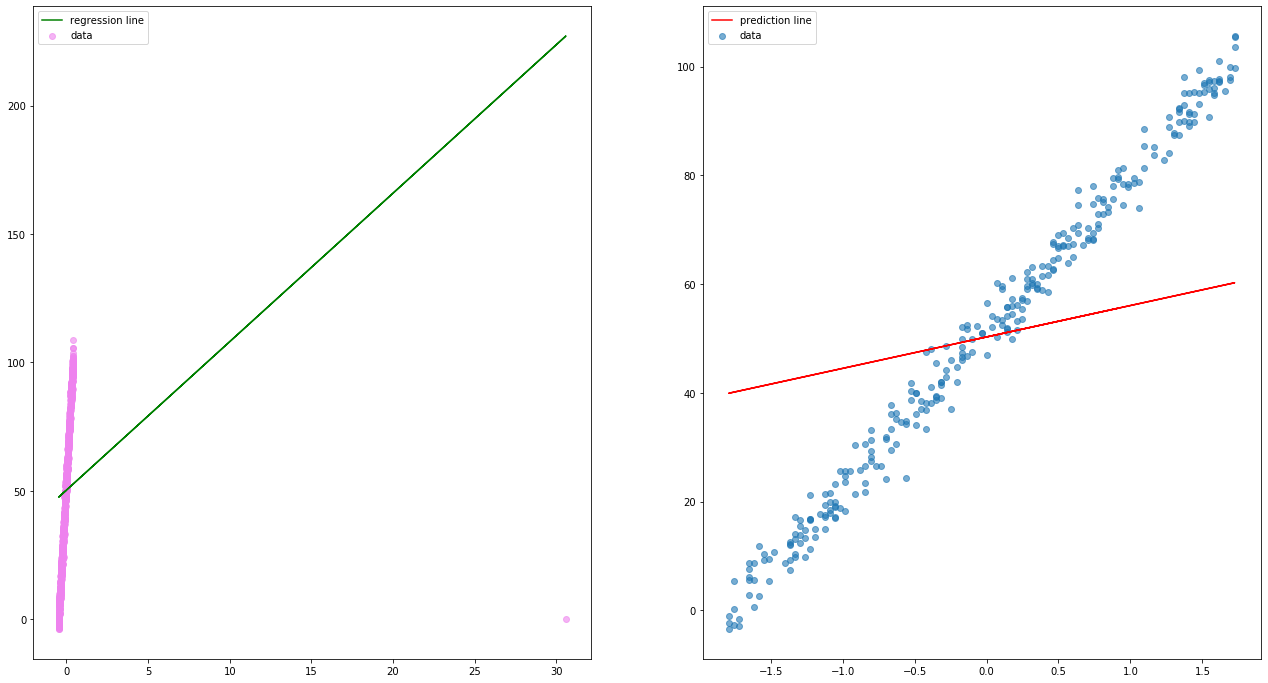

In [219]:
#Plotting both regression and prediction lines 
plt.gcf().set_size_inches(22, 12, forward=True)
plt.subplot(1, 2, 1)
plt.scatter(Xs, ys, color = 'violet', label = 'data',alpha=0.6) 
plt.plot(Xs, regression_line, color = 'green', label = 'regression line')
plt.legend(loc = 2)

plt.subplot(1, 2, 2)
plt.scatter(X_test,y_test,label='data',alpha=0.6)
plt.plot(X_test,y_pred2,color='red',label='prediction line')
plt.legend(loc = 'upper left')
plt.show()

In [195]:
#Accuracy Scores
prediction=r2_score(y_test,y_pred2)
regression=r2_score(ys,regression_line)
print(prediction,regression)

0.3555095923124283 0.03946202842569235


Lesson learnt: Regression models do not work well with missing values. It is better to drop than impute. This goes to show that ML models do not work well with outliers. That is why it was better to drop the whole row than impute the missing y value